# 5주차

In [1]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
# 타이타닉 데이터 로딩
train = pd.read_csv('/content/drive/MyDrive/Titanic/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Titanic/test.csv')

## 간단 EDA

Cabin          687
Age            177
Embarked         2
PassengerId      0
Name             0
Pclass           0
Survived         0
Sex              0
Parch            0
SibSp            0
Fare             0
Ticket           0
dtype: int64
Cabin          327
Age             86
Fare             1
Name             0
Pclass           0
PassengerId      0
Sex              0
Parch            0
SibSp            0
Ticket           0
Embarked         0
dtype: int64


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49373 (\N{HANGUL SYLLABLE SAENG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51316 (\N{HANGUL SYLLABLE JON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)

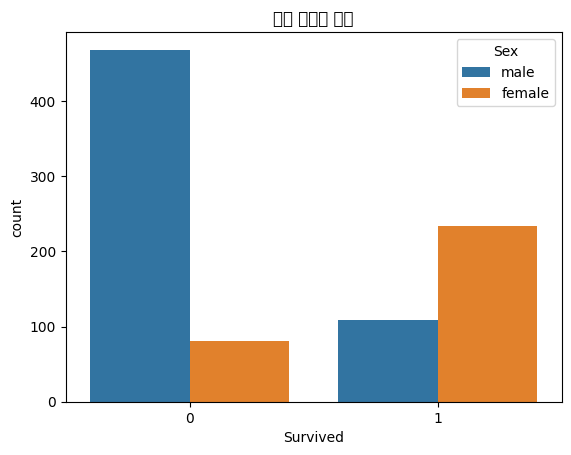

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45208 (\N{HANGUL SYLLABLE NA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50752 (\N{HANGUL SYLLABLE WA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49373 (\N{HANGUL SYLLABLE SAENG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51316 (\N{HANGUL SYLLABLE JON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/lo

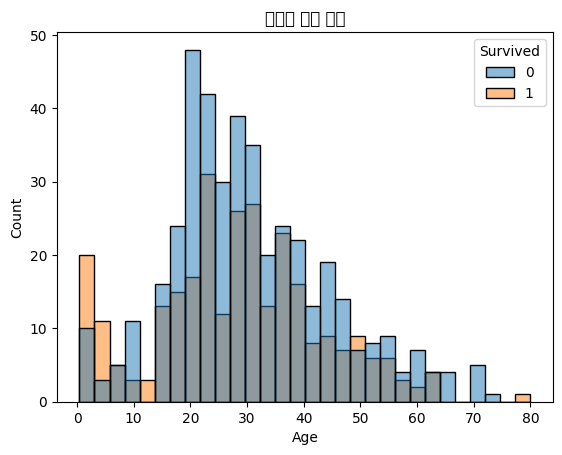

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

#결측치 확인
print(train.isnull().sum().sort_values(ascending=False))
print(test.isnull().sum().sort_values(ascending=False))

# 생존율 확인
sns.countplot(data=train, x="Survived", hue="Sex")
plt.title("성별 생존율 비교")
plt.show()

# 나이 분포
sns.histplot(data=train, x="Age", hue="Survived", bins=30)
plt.title("나이와 생존 관계")
plt.show()




##데이터 전처리

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52824 (\N{HANGUL SYLLABLE CI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54805 (\N{HANGUL SYLLABLE HYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/u

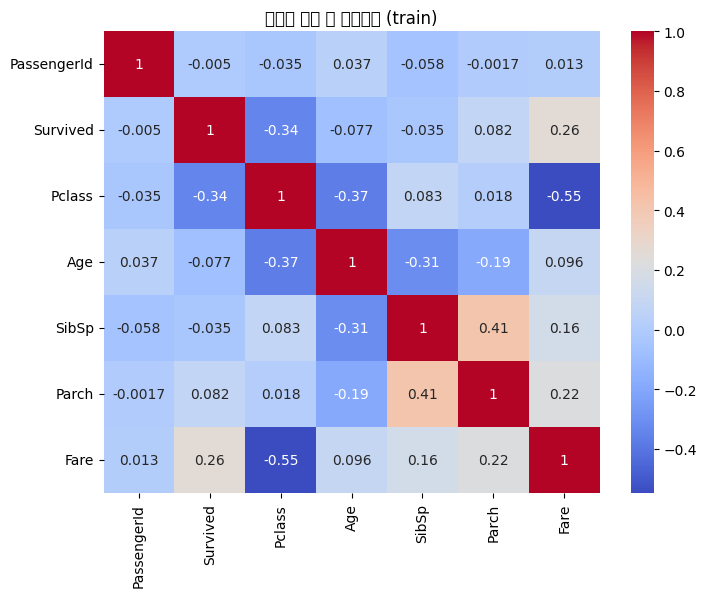

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# 수치형 변수 간 상관관계 확인
numeric_cols = train.select_dtypes(include=['int64', 'float64']).columns
corr = train[numeric_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("수치형 변수 간 상관관계 (train)")
plt.show()

Age 결측치를 어떻게 하면 현명하게 처리할 수 있을까 고민하다가 선형 상관관계가 있나 분석해보았다. 0.34를 가진 Pclass 변수가 다소 상관관계가 있지만 얘를 기준으로 예측하기에는 무리가 있어보였다.

In [19]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# 원본 데이터 복사
train_processed = train.copy()
test_processed = test.copy()

# 결측치 처리
train_processed["Age"] = train_processed.groupby(["Pclass", "Sex"])["Age"].transform(lambda x: x.fillna(x.mean()))
train_processed["Embarked"] = train_processed["Embarked"].fillna(train_processed["Embarked"].mode()[0])

test_processed["Age"] = test_processed.groupby(["Pclass", "Sex"])["Age"].transform(lambda x: x.fillna(x.mean()))
test_processed["Fare"] = test_processed["Fare"].fillna(test_processed.groupby("Pclass")["Fare"].transform("mean"))

# FamilySize 변수 생성
train_processed["FamilySize"] = train_processed["SibSp"] + train_processed["Parch"] + 1
test_processed["FamilySize"] = test_processed["SibSp"] + test_processed["Parch"] + 1
"""
# 이상치 처리 (Fare 기준 IQR)
Q1 = train_processed['Fare'].quantile(0.25)
Q3 = train_processed['Fare'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
train_processed = train_processed[(train_processed['Fare'] >= lower_bound) & (train_processed['Fare'] <= upper_bound)].copy()
#얘는 빼는게 성능이 더 나았음, 상류층일수록 생존률이 높기 때문일듯"""

# 필요 없는 열 제거 (존재할 경우만 제거)
test_ids = test_processed["PassengerId"]
cols_to_drop = ["PassengerId", "Name", "Ticket", "Cabin", "SibSp", "Parch"]
train_processed = train_processed.drop(columns=[col for col in cols_to_drop if col in train_processed.columns])
test_processed = test_processed.drop(columns=[col for col in cols_to_drop if col in test_processed.columns])

# 범주형 변수 인코딩
cols = ["Sex", "Embarked"]
le = LabelEncoder()
for col in cols:
    train_processed[col] = le.fit_transform(train_processed[col])
    test_processed[col] = le.transform(test_processed[col])
'''
# AgeGroup 범주형으로 변환
def age_category(age):
    if age < 13:
        return 'Child'
    elif age < 20:
        return 'Teen'
    elif age < 36:
        return 'Young'
    elif age < 61:
        return 'Adult'
    else:
        return 'Senior'

train_processed["AgeGroup"] = train_processed["Age"].apply(age_category)
test_processed["AgeGroup"] = test_processed["Age"].apply(age_category)



# AgeGroup 원-핫 인코딩
X = pd.get_dummies(X, columns=["AgeGroup"], drop_first=True)
test_processed = pd.get_dummies(test_processed, columns=["AgeGroup"], drop_first=True)
'''

# 타겟 분리
X = train_processed.drop("Survived", axis=1)
y = train_processed["Survived"]

# 열 정렬 일치
X, test_processed = X.align(test_processed, join='left', axis=1, fill_value=0)


## 모델링

AgeGroup 범주형으로 변환했을때+ 이상치 제거 버전

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1. 학습/검증 데이터 분리
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. 모델 정의
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='logloss')
}

# 3. 학습 및 평가
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_val)
    acc = accuracy_score(y_val, preds)
    print(f"\n📌 {name}")
    print(f"✅ Accuracy: {acc:.4f}")
    print(classification_report(y_val, preds))



📌 Logistic Regression
✅ Accuracy: 0.7806
              precision    recall  f1-score   support

           0       0.79      0.88      0.83        95
           1       0.77      0.62      0.69        60

    accuracy                           0.78       155
   macro avg       0.78      0.75      0.76       155
weighted avg       0.78      0.78      0.77       155


📌 Random Forest
✅ Accuracy: 0.7613
              precision    recall  f1-score   support

           0       0.78      0.85      0.81        95
           1       0.73      0.62      0.67        60

    accuracy                           0.76       155
   macro avg       0.75      0.73      0.74       155
weighted avg       0.76      0.76      0.76       155


📌 XGBoost
✅ Accuracy: 0.8129
              precision    recall  f1-score   support

           0       0.81      0.91      0.86        95
           1       0.82      0.67      0.73        60

    accuracy                           0.81       155
   macro avg       0

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:03:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


AgeGroup 범주형으로 변환했을때+ 이상치 *제거안한* 버전


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1. 학습/검증 데이터 분리
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. 모델 정의
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='logloss')
}

# 3. 학습 및 평가
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_val)
    acc = accuracy_score(y_val, preds)
    print(f"\n📌 {name}")
    print(f"✅ Accuracy: {acc:.4f}")
    print(classification_report(y_val, preds))


📌 Logistic Regression
✅ Accuracy: 0.8156
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.81      0.82      0.81       179


📌 Random Forest
✅ Accuracy: 0.8212
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       105
           1       0.79      0.77      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179


📌 XGBoost
✅ Accuracy: 0.7989
              precision    recall  f1-score   support

           0       0.83      0.82      0.83       105
           1       0.75      0.77      0.76        74

    accuracy                           0.80       179
   macro avg       0

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:04:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


AgeGroup 범주형으로 변환 안했을때 + 이상치 처리 한 버전

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1. 학습/검증 데이터 분리
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. 모델 정의
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='logloss')
}

# 3. 학습 및 평가
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_val)
    acc = accuracy_score(y_val, preds)
    print(f"\n📌 {name}")
    print(f"✅ Accuracy: {acc:.4f}")
    print(classification_report(y_val, preds))


📌 Logistic Regression
✅ Accuracy: 0.7613
              precision    recall  f1-score   support

           0       0.76      0.88      0.82        95
           1       0.76      0.57      0.65        60

    accuracy                           0.76       155
   macro avg       0.76      0.73      0.73       155
weighted avg       0.76      0.76      0.75       155


📌 Random Forest
✅ Accuracy: 0.7677
              precision    recall  f1-score   support

           0       0.79      0.84      0.82        95
           1       0.72      0.65      0.68        60

    accuracy                           0.77       155
   macro avg       0.76      0.75      0.75       155
weighted avg       0.77      0.77      0.77       155


📌 XGBoost
✅ Accuracy: 0.7935
              precision    recall  f1-score   support

           0       0.80      0.88      0.84        95
           1       0.78      0.65      0.71        60

    accuracy                           0.79       155
   macro avg       0

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:06:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


AgeGroup 범주형으로 변환 안했을때 + 이상치 처리 안한 버전

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1. 학습/검증 데이터 분리
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. 모델 정의
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='logloss')
}

# 3. 학습 및 평가
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_val)
    acc = accuracy_score(y_val, preds)
    print(f"\n📌 {name}")
    print(f"✅ Accuracy: {acc:.4f}")
    print(classification_report(y_val, preds))


📌 Logistic Regression
✅ Accuracy: 0.8212
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179


📌 Random Forest
✅ Accuracy: 0.8436
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       105
           1       0.81      0.81      0.81        74

    accuracy                           0.84       179
   macro avg       0.84      0.84      0.84       179
weighted avg       0.84      0.84      0.84       179


📌 XGBoost
✅ Accuracy: 0.7877
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       105
           1       0.74      0.76      0.75        74

    accuracy                           0.79       179
   macro avg       0

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:07:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


당황스럽지만 전처리가 가장 간단했던 얘로 진행하기로함. GridSearchCV을 이용해서 Random Forest의 최적의 파라미터를 찾아보겠음

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# 랜덤 탐색 설정
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions={
        'n_estimators': [100, 200, 300],
        'max_depth': [5, 10, 15, 20, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2']
    },
    n_iter=30,       # 랜덤 조합 30개만 테스트
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2,
    random_state=42
)

random_search.fit(X, y)

print("✅ Best Parameters:", random_search.best_params_)
print("✅ Best Accuracy:", random_search.best_score_)


Fitting 5 folds for each of 30 candidates, totalling 150 fits
✅ Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None}
✅ Best Accuracy: 0.8272048207896553
